Loading data...
Mean Squared Error: 2806426667.25
R² Score: 0.634
Predicted price for 2000 sqft, 3-bed, 2-bath house: $240,377.51


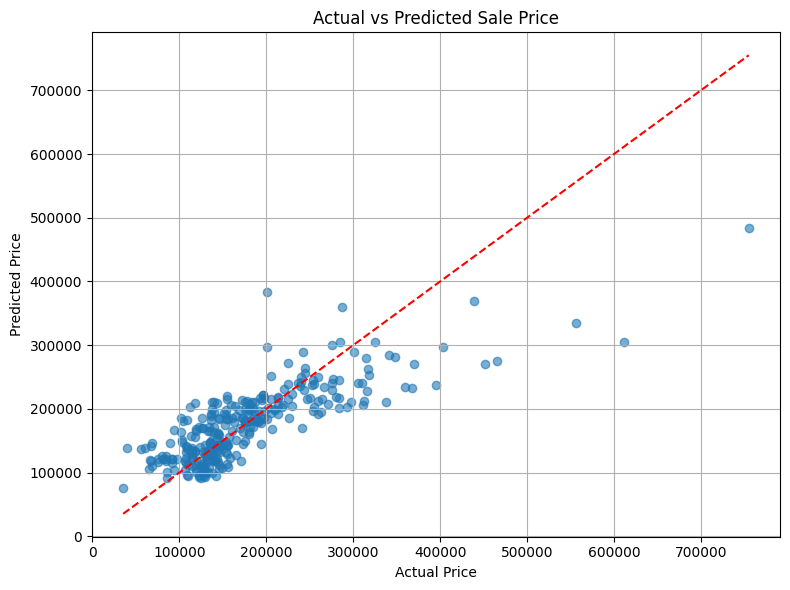

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load Ames Housing dataset
print("Loading data...")
ames = fetch_openml(name="house_prices", as_frame=True)
df = ames.frame

# Select features: square footage, bedrooms, bathrooms
features = ['GrLivArea', 'BedroomAbvGr', 'FullBath']
target = 'SalePrice'
X = df[features]
y = df[target]

# Handle missing values
X = X.dropna()
y = y[X.index]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.3f}")

# Predict a new house price
new_house = pd.DataFrame([[2000, 3, 2]], columns=features)
predicted_price = model.predict(new_house)
print(f"Predicted price for 2000 sqft, 3-bed, 2-bath house: ${predicted_price[0]:,.2f}")

# Plot actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Sale Price")
plt.grid(True)
plt.tight_layout()
plt.show()

